In [1]:
import numpy as np
from structure import central_thermal, integrate
from eos import mean_molecular_weight
from zams import Teff, surface_luminosity
from astro_const import Rsun, Msun
from scipy.optimize import brentq

r0 = 0.000000001

delta_m = 1e-30

eta = 9e-20

xi = 0.05

XH = 0.706

Z = np.array([1,2,7])
A = np.array([1,4, 14])
X = np.array([XH, 0.275, 0.019])

mu = mean_molecular_weight(Z,A,X)

# S_mass = 0.3
R = 0.33333


def min_this(R_guess, S_mass, delta_m, eta, xi, mu):

    Pc, rhoc, Tc = central_thermal(S_mass, R_guess, mu)

    m, r, p, l = integrate(Pc,rhoc,Tc,delta_m,eta,xi,mu)

    # calculating desired radius
    L_surface = surface_luminosity(Teff(S_mass*Msun),R_guess*Rsun)

    return l[-1] - L_surface

mass_list = np.linspace(0.1,0.31,10)
# mass_list = [0.1]
L_list = np.zeros(len(mass_list))
Teff_list = np.zeros(len(mass_list))
rhoc_list = np.zeros(len(mass_list))
Tc_list = np.zeros(len(mass_list))

for i,S_mass in enumerate(mass_list):
    R_final = brentq(min_this,a = 0.01, b = 1, xtol = 1e-10,args = (S_mass, delta_m, eta, xi, mu))

    T_surf = Teff(S_mass)

    Teff_list[i] = T_surf

    L_list[i] = surface_luminosity(T_surf,R_final)

    Pc, rhoc, Tc = central_thermal(S_mass, R_final, mu)

    rhoc_list[i] = rhoc

    Tc_list[i] = Tc

print(R_final)

Pc, rhoc, Tc = central_thermal(S_mass, R_final, mu)

m, r, p, l = integrate(Pc,rhoc,Tc,delta_m,eta,xi,mu)

print(R*Rsun - r[-1])

C:\Users\Michael\School\ast304-F22\AST_304_Projects\project3\structure.py:139: RuntimeWarning: overflow encountered in true_divide
  H_z = z/np.abs(dzdm)
C:\Users\Michael\School\ast304-F22\AST_304_Projects\project3\structure.py:139: RuntimeWarning: divide by zero encountered in true_divide
  H_z = z/np.abs(dzdm)


0.3176812440963603
14233326.986545265


Text(0, 0.5, 'log($L/L_\\odot$)')

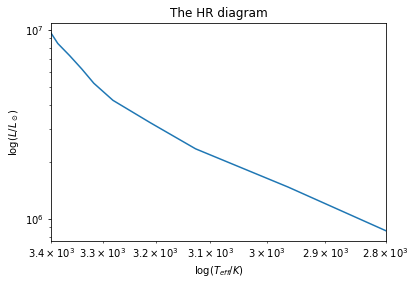

In [23]:
import matplotlib.pyplot as plt

plt.plot(Teff_list,L_list)
plt.xlim(max(Teff_list), min(Teff_list))
plt.xscale("log")
plt.yscale("log")

plt.title("The HR diagram")
plt.xlabel(r"log($T_{eff}/K$)")
plt.ylabel(r"log($L/L_\odot$)")

Text(0, 0.5, 'log($T_c/K$)')

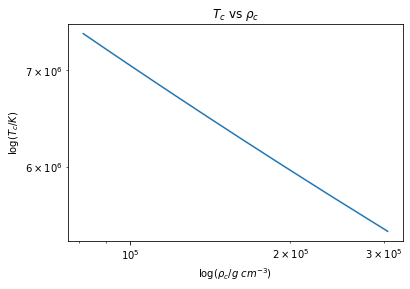

In [26]:
plt.plot(rhoc_list,Tc_list)
plt.xscale("log")
plt.yscale("log")

plt.title(r"$T_c$ vs $\rho_c$")
plt.xlabel(r"log($\rho_c/g$ $cm^{-3}$)")
plt.ylabel(r"log($T_c/K$)")

In [32]:
R_final = brentq(min_this,a = 0.01, b = 1, xtol = 1e-10,args = (.3, delta_m, eta, xi, mu))
Pc, rhoc, Tc = central_thermal(.3, R_final, mu)
m, r, p, l = integrate(Pc,rhoc,Tc,delta_m,eta,xi,mu)

C:\Users\Michael\School\ast304-F22\AST_304_Projects\project3\structure.py:139: RuntimeWarning: overflow encountered in true_divide
  H_z = z/np.abs(dzdm)
C:\Users\Michael\School\ast304-F22\AST_304_Projects\project3\structure.py:139: RuntimeWarning: divide by zero encountered in true_divide
  H_z = z/np.abs(dzdm)


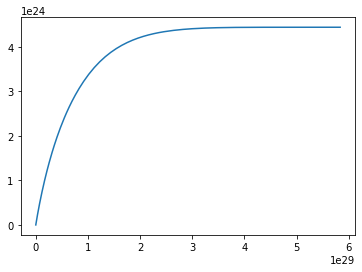

In [46]:
plt.plot(m,l)

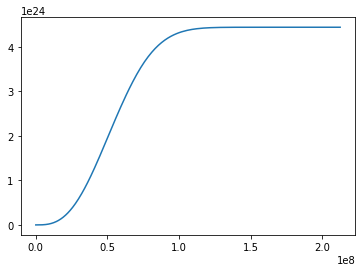

In [47]:
plt.plot(r,l)

In [53]:
r[np.max(np.where(l <= np.max(l)*0.9))]

83346990.69406585

In [55]:
m[np.max(np.where(l <= np.max(l)*0.9))]/(.3*Msun)

0.25875734548717216

In [38]:
T = Tc*(p/Pc)**(1-1/(5/3))

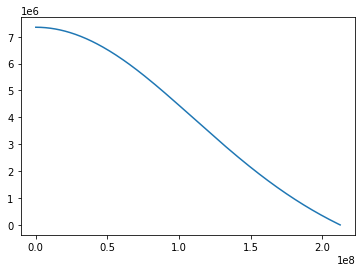

In [44]:
plt.plot(r,T)

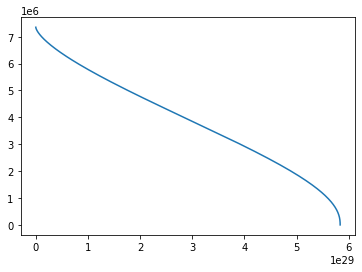

In [45]:
plt.plot(m,T)